In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf

/home/faiz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
# 1 Million Points
x_data = np.linspace(0.0,10.0,1000000)

In [5]:
noise = np.random.randn(len(x_data))

In [7]:
# y = mx + b + noise_levels
b = 5

y_true =  (0.5 * x_data ) + 5 + noise

In [8]:
y_true

array([ 5.33816333,  4.91949233,  5.22086978, ...,  9.8464617 ,
       10.05400456,  9.27864522])

In [15]:
my_data = pd.concat([pd.DataFrame(data=x_data,columns=['X Data']),pd.DataFrame(data=y_true,columns=['Y'])],axis=1)

In [17]:
my_data.head()

,X Data,Y
0,0.00000,5.338163
1,0.00001,4.919492
2,0.00002,5.220870
3,0.00003,6.397637
4,0.00004,4.000764


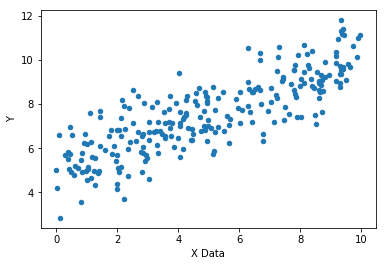

In [19]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')

# Tensorflow

In [20]:
# Random 10 points to grab
batch_size =8

In [22]:
# Variables
m = tf.Variable(0.5)
b = tf.Variable(1.0)

In [24]:
# Placeholders
xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

In [28]:
# Graph
y_model = m*xph + b

In [30]:
# loss function
error = tf.reduce_sum(tf.square(yph-y_model))

In [31]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [32]:
init = tf.global_variables_initializer()

In [33]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict=feed)
        
    model_m,model_b = sess.run([m,b])

In [34]:
feed

{<tf.Tensor 'Placeholder:0' shape=(8,) dtype=float32>: array([8.03970804, 6.57423657, 8.05938806, 1.27702128, 8.97455897,
        7.1014671 , 2.28659229, 0.09271009]),
 <tf.Tensor 'Placeholder_1:0' shape=(8,) dtype=float32>: array([9.59183806, 8.46776107, 9.38984042, 6.91095172, 8.99918933,
        8.56150451, 6.23149515, 3.43848401])}

In [35]:
# results
y_hat = x_data * model_m + model_b

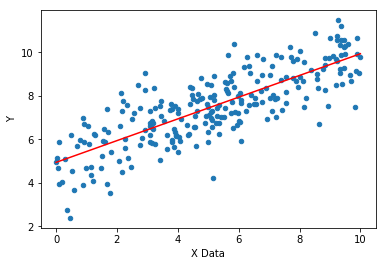

In [36]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

# TF Estimator API